In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import sys
%matplotlib inline
sns.set()

In [195]:
data = loadmat('ex3data1.mat')
weights = loadmat('ex3weights.mat')
x = np.c_[np.ones((data['X'].shape[0],1)), data['X']]
y = np.array(data['y'])
initialTheta = np.zeros((401, 1))
theta1 = np.array(weights['Theta1'])
theta2 = np.array(weights['Theta2'])

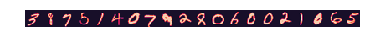

In [196]:
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [197]:
def gFunction(z):
    return 1 / (1 + np.exp(-z))

In [202]:
def hFunction(theta, X):
    theta = np.array(theta)
    h = np.array(gFunction(np.round(np.dot(X, theta), 4)))
    return h

In [203]:
def costFunction(theta, X, y):
    m = y.size
    h = hFunction(theta, X)
    j = (-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))
    return j

In [204]:
def gradientDescent(theta, X, y):
    m = y.size
    h = hFunction(theta, X)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient.reshape(-1, 1)

In [205]:
print(hFunction(initialTheta, x).shape)
print(costFunction(initialTheta, x, y).shape)
print(gradientDescent(initialTheta, x, y).shape)

(5000, 1)
(1, 1)
(401, 1)


In [206]:
def regularizedCostFunction(theta, x, y, λ = 0.1):
    m = y.size
    h = hFunction(theta, x)
    j = ((-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))) + (λ / (2 *  m)) * np.sum(np.square(theta[1:]))
    return j

In [211]:
def regularizedGradientDescent(theta, x, y, λ = 0.1):
    m = y.size
    h = hFunction(theta, x).reshape(-1, 1)
    theta[0] = 1
    gradient = (1 / m) * np.dot(x.T, (h - y)) + (λ / m * theta).reshape(-1, 1)
    return gradient

In [212]:
print(regularizedCostFunction(initialTheta, x, y, 0.1).shape)
print(regularizedGradientDescent(initialTheta, x, (y == 4) * 1, 0.1).shape)

(1, 1)
(401, 1)


In [215]:
def oneVsAll(features, classes, numberOfClassifier, λ):
    theta = np.zeros((x.shape[1], numberOfClassifier))
    for cls in range(1, numberOfClassifier + 1):
        optimum = sc.optimize.minimize(regularizedCostFunction, initialTheta, args = (x, y), method = None,
        jac = regularizedGradientDescent, options = {'maxiter':50})
        print(optimum)

In [216]:
oneVsAll(x, y, 10, 0.1)

ValueError: shapes (401,1) and (401,1) not aligned: 1 (dim 1) != 401 (dim 0)